# LJ potential gradcheck analysis.

Plot & analysis of backform form gradcheck. Noticing a _relatively_ high rtol is required on the gradcheck test, eyeballing to sanity check.

## Get gradcheck data from test layer

In [8]:
import tmol.tests.score.ljlk.test_potential
import importlib
importlib.reload(tmol.tests.score.ljlk.test_potential)
gradcheck = tmol.tests.score.ljlk.test_potential.lj_gradcheck()

## Error Summary

In [9]:
errors = gradcheck.set_index("dist")[["absolute", "relative"]].stack().rename("error")
errors.index.rename(("dist", "type"), inplace=True)
errors = errors.to_frame().reset_index()
errors.groupby("type").describe()

dist                                                         \
          count      mean       std  min       25%       50%       75%   
type                                                                     
absolute  100.0  3.050000  1.787577  0.0  1.525000  3.050000  4.575000   
relative   98.0  2.988384  1.752002  0.0  1.494192  2.988384  4.482576   

                    error                                                    \
               max  count      mean       std       min       25%       50%   
type                                                                          
absolute  6.100000  100.0 -0.006548  0.194960 -0.399109 -0.001050  0.000066   
relative  5.976768   98.0 -0.000145  0.001672 -0.005813 -0.000722  0.000263   

                              
               75%       max  
type                          
absolute  0.005923  0.821594  
relative  0.001119  0.002707

## Co-plot analytic/numeric derivs

Plot of numeric/analytic appears sane across derivative range. There is a spike in relative error at

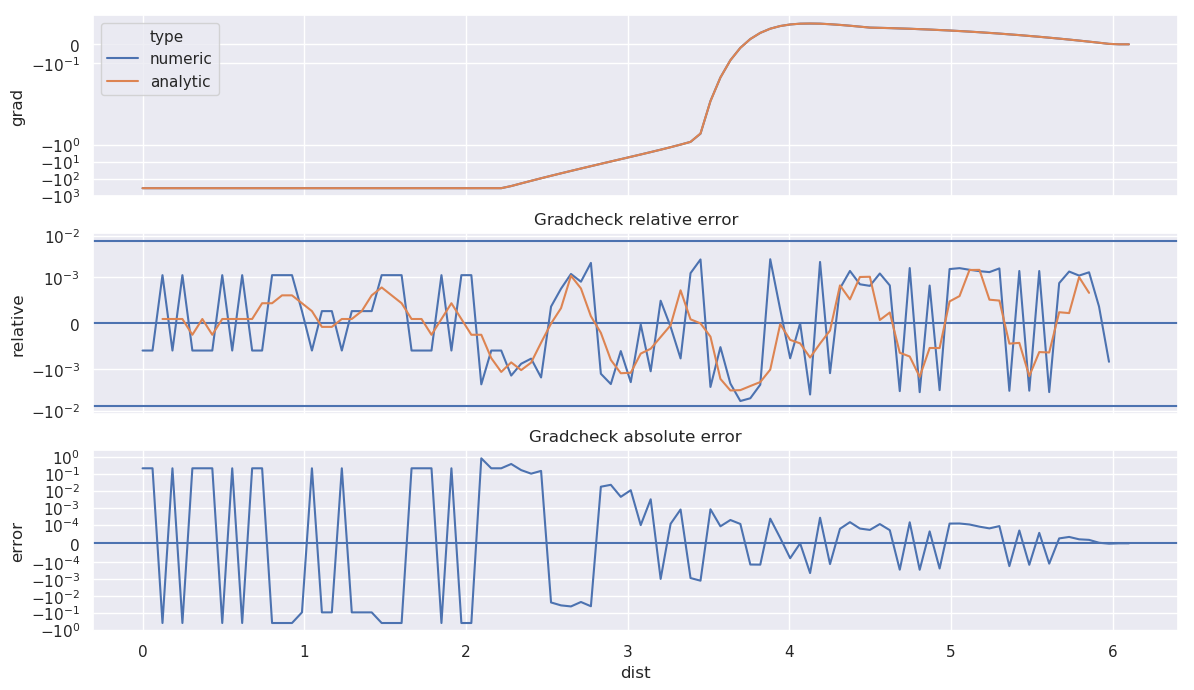

In [10]:
import seaborn
from matplotlib import pyplot
import matplotlib

f, (a1, a2, a3) = pyplot.subplots(nrows=3, sharex=True)


pyplot.sca(a1)
seaborn.lineplot("dist", "grad", hue="type", data=grads)
pyplot.yscale("symlog", linthreshy=.5, linscaley=5 )

pyplot.sca(a2)
pyplot.title("Gradcheck relative error")
pyplot.axhline(0)
pyplot.axhline(7.5e-3)
pyplot.axhline(-7.5e-3)
pyplot.yscale("symlog", linthreshy=1e-3, linscaley=1 )

seaborn.lineplot("dist", "relative", data=gradcheck)
seaborn.lineplot("dist", "relative", data=gradcheck.rolling(5).mean())

pyplot.sca(a3)
pyplot.title("Gradcheck absolute error")
pyplot.axhline(0)
pyplot.yscale("symlog", linthreshy=1e-4, linscaley=1 )

seaborn.lineplot("dist", "error", data=errors.query("type == 'absolute'"))